In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import torch
from torch_geometric.explain import Explanation
import torch_geometric

import src.classifier as classifier

### Representation of the training data

In [2]:
def clean_data(data: pd.DataFrame):
    '''clean recipe-structured DataFrame'''
    return data[['directions', 'like_or_dislike']].rename(columns = {'directions': 'text', 'like_or_dislike': 'classification'})

data = pd.read_csv('data/preferences.csv')
data = clean_data(data)

Getting graph networks...
Calculating similarity...
Train network complete...
Calculating similarity...
Test network complete...
Initializing model...
Training model...


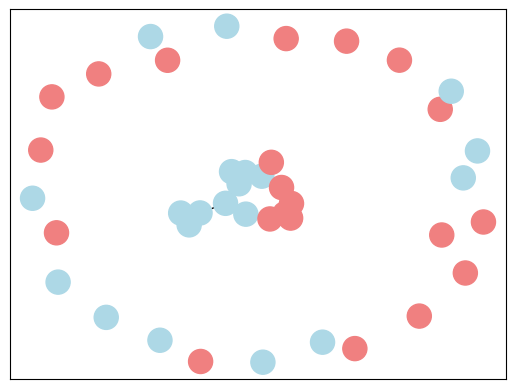

In [28]:
model = classifier.RecipeDataClassification(data = data)
model.train()

graph = model.train_representation
G = torch_geometric.utils.to_networkx(graph, to_undirected=True)

y = graph.to_dict()['y']
y_colors = []
for label in y:
    if label == 1.0:
        y_colors.append('lightblue')
    else:
        y_colors.append('lightcoral')

nx.draw_networkx(G, node_color = y_colors, with_labels = False)

### Training history

In [29]:
train_history = model.most_recent_training_history

train_history['accuracy']

[0.5714285969734192,
 0.5714285969734192,
 0.4285714328289032,
 0.4285714328289032,
 0.4285714328289032,
 0.4285714328289032,
 0.6428571343421936,
 0.6428571343421936,
 0.5714285969734192,
 0.5714285969734192,
 0.5714285969734192,
 0.5714285969734192,
 0.6428571343421936,
 0.7142857313156128,
 0.9285714030265808,
 0.8571428656578064,
 0.6428571343421936,
 0.6428571343421936,
 0.7857142686843872,
 0.9285714030265808,
 0.9285714030265808,
 0.8571428656578064,
 0.7142857313156128,
 0.6428571343421936,
 0.6428571343421936,
 0.6428571343421936,
 0.7142857313156128,
 0.7857142686843872,
 0.9285714030265808,
 0.9285714030265808,
 0.9285714030265808,
 0.9285714030265808,
 0.9285714030265808,
 0.9285714030265808,
 0.8571428656578064,
 0.8571428656578064,
 0.7857142686843872,
 0.7857142686843872,
 0.8571428656578064,
 0.8571428656578064,
 0.8571428656578064,
 0.8571428656578064,
 0.8571428656578064,
 0.8571428656578064,
 0.8571428656578064,
 0.8571428656578064,
 0.8571428656578064,
 0.8571428656

Text(0, 0.5, 'Accuracy')

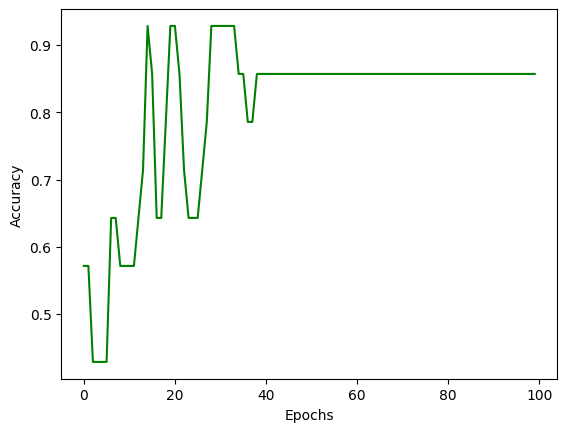

In [30]:
plt.plot(train_history['accuracy'], color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')